In [1]:
import re
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from ast import literal_eval

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings('ignore') 
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") 
np.random.seed(7)
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from numpy import inf
from sklearn.metrics import f1_score
import math
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
reviews = pd.read_csv('amazondata.csv', sep = '\t', encoding = 'utf-8')

In [3]:
data = "amazondata.csv"
reviews = pd.read_csv(data)

In [4]:
reviews.head()

id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

        asins   brand                                         categories  \
0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   

                                                keys manufacturer  \
0  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
1  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
2  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
3  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   
4  841667104676,amazon/53004484,amazon/b01ahb9cn2...       Amazon   

               reviews.date     reviews.dateAdded  \
0  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
1  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
2  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
3  2017-01-13T00:00:00.000Z  2017-07-03T23:33:15Z   
4  2017-01-12T00:00:00.000Z  2017-07-03T23:33:15Z   

                                    reviews.dateSeen  ... reviews.doRecommend  \
0  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
1  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
2  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
3  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   
4  2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z  ...                True   

  reviews.id  reviews.numHelpful  reviews.rating  \
0        NaN                 0.0             5.0   
1        NaN                 0.0             5.0   
2        NaN                 0.0             5.0   
3        NaN                 0.0             4.0   
4        NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title reviews.userCity  \
0                                   Kindle              NaN   
1                                very fast              NaN   
2  Beginner tablet for our 9 year old son.              NaN   
3                                  Good!!!              NaN   
4                Fantastic Tablet for kids              NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 21 columns]

In [5]:
reviews.tail()

id name       asins   brand  \
34655  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34656  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34657  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34658  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   
34659  AVpfiBlyLJeJML43-4Tp  NaN  B006GWO5WK  Amazon   

                                              categories  \
34655  Computers/Tablets & Networking,Tablet & eBook ...   
34656  Computers/Tablets & Networking,Tablet & eBook ...   
34657  Computers/Tablets & Networking,Tablet & eBook ...   
34658  Computers/Tablets & Networking,Tablet & eBook ...   
34659  Computers/Tablets & Networking,Tablet & eBook ...   

                                                    keys  \
34655  newamazonkindlefirehd9wpowerfastadaptercharger...   
34656  newamazonkindlefirehd9wpowerfastadaptercharger...   
34657  newamazonkindlefirehd9wpowerfastadaptercharger...   
34658  newamazonkindlefirehd9wpowerfastadaptercharger...   
34659  newamazonkindlefirehd9wpowerfastadaptercharger...   

                       manufacturer          reviews.date reviews.dateAdded  \
34655  Amazon Digital Services, Inc  2012-09-18T00:00:00Z               NaN   
34656  Amazon Digital Services, Inc  2012-11-21T00:00:00Z               NaN   
34657  Amazon Digital Services, Inc  2012-10-19T00:00:00Z               NaN   
34658  Amazon Digital Services, Inc  2012-10-31T00:00:00Z               NaN   
34659  Amazon Digital Services, Inc  2012-12-23T00:00:00Z               NaN   

           reviews.dateSeen  ... reviews.doRecommend reviews.id  \
34655  2015-08-29T00:00:00Z  ...                 NaN        NaN   
34656  2015-09-02T00:00:00Z  ...                 NaN        NaN   
34657  2015-09-04T00:00:00Z  ...                 NaN        NaN   
34658  2015-09-01T00:00:00Z  ...                 NaN        NaN   
34659  2015-11-01T00:00:00Z  ...                 NaN        NaN   

       reviews.numHelpful  reviews.rating  \
34655                 NaN             3.0   
34656                 NaN             1.0   
34657                 NaN             1.0   
34658                 NaN             1.0   
34659                 NaN             1.0   

                                      reviews.sourceURLs  \
34655  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34656  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34657  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34658  http://www.amazon.com/Amazon-PowerFast-Adapter...   
34659  http://www.amazon.com/Amazon-PowerFast-Adapter...   

                                            reviews.text  \
34655  This is not appreciably faster than any other ...   
34656  Amazon should include this charger with the Ki...   
34657  Love my Kindle Fire but I am really disappoint...   
34658  I was surprised to find it did not come with a...   
34659  to spite the fact that i have nothing but good...   

                                           reviews.title reviews.userCity  \
34655  Not appreciably faster than any other 1.8A cha...              NaN   
34656                                 Should be included              NaN   
34657                              Disappointing Charger              NaN   
34658                                Not worth the money              NaN   
34659                              as with everyone else              NaN   

       reviews.userProvince  reviews.username  
34655                   NaN              Kris  
34656                   NaN  Jonathan Stewart  
34657                   NaN          J Lawson  
34658                   NaN    Just the Buyer  
34659                   NaN             sandi  

[5 rows x 21 columns]

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34627 non-null  object 
 1   name                  27868 non-null  object 
 2   asins                 34625 non-null  object 
 3   brand                 34627 non-null  object 
 4   categories            34627 non-null  object 
 5   keys                  34627 non-null  object 
 6   manufacturer          34627 non-null  object 
 7   reviews.date          34598 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34627 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

<AxesSubplot:>

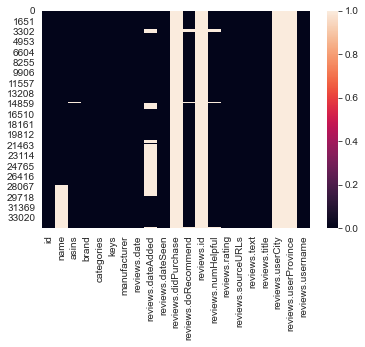

In [7]:
sns.heatmap(reviews.isnull())

In [8]:
reviews.describe()

reviews.id  reviews.numHelpful  reviews.rating  reviews.userCity  \
count          1.0        34131.000000    34627.000000               0.0   
mean   111372787.0            0.630248        4.584573               NaN   
std            NaN           13.215775        0.735653               NaN   
min    111372787.0            0.000000        1.000000               NaN   
25%    111372787.0            0.000000        4.000000               NaN   
50%    111372787.0            0.000000        5.000000               NaN   
75%    111372787.0            0.000000        5.000000               NaN   
max    111372787.0          814.000000        5.000000               NaN   

       reviews.userProvince  
count                   0.0  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

<AxesSubplot:>

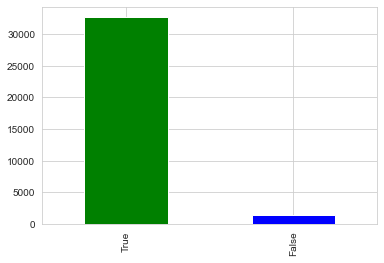

In [9]:
reviews['reviews.doRecommend'].value_counts().plot.bar(color = [ 'green','blue'])

<AxesSubplot:>

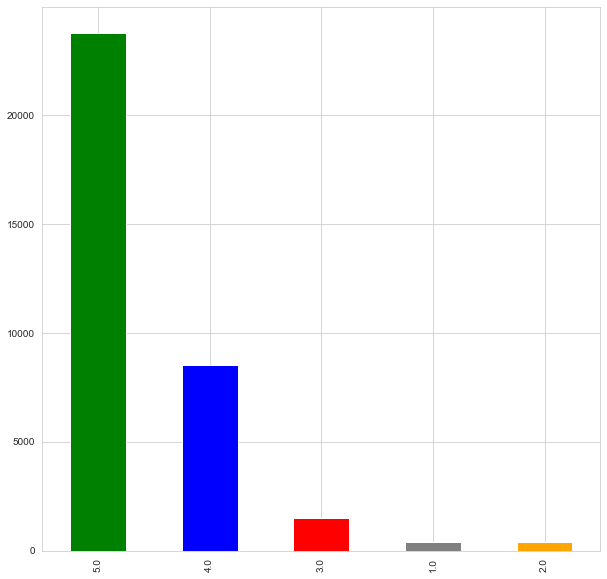

In [10]:
plt.figure(figsize = (10,10))
reviews['reviews.rating'].value_counts().plot.bar(color = [ 'green','blue','red','grey','orange'])

<AxesSubplot:xlabel='reviews.rating', ylabel='reviews.numHelpful'>

<Figure size 1080x720 with 0 Axes>

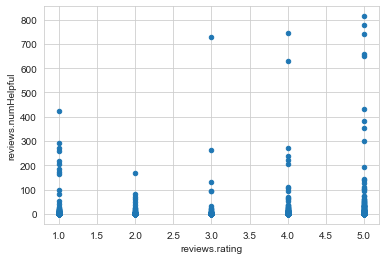

In [11]:
plt.figure(figsize = (15,10))
reviews.plot(kind = 'scatter', x = 'reviews.rating', y = 'reviews.numHelpful')

In [12]:
cleanreviews = reviews.dropna(subset = ['reviews.rating','reviews.numHelpful'] )

In [13]:
cleanreviews.isnull().any()

id                      False
name                     True
asins                   False
brand                   False
categories              False
keys                    False
manufacturer            False
reviews.date             True
reviews.dateAdded        True
reviews.dateSeen        False
reviews.didPurchase      True
reviews.doRecommend      True
reviews.id               True
reviews.numHelpful      False
reviews.rating          False
reviews.sourceURLs      False
reviews.text            False
reviews.title            True
reviews.userCity         True
reviews.userProvince     True
reviews.username         True
dtype: bool

In [14]:
len(cleanreviews)

34131

In [15]:
pearsonr(cleanreviews['reviews.rating'], cleanreviews['reviews.numHelpful'])

(-0.04239535375797332, 4.666158383728314e-15)

In [16]:
#The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two variables.
#The p-value is < 0.05 the correlation coefficient is called statistically significant.
#Pearson’s r value almost equal to 0 hence no linear relationship between reviews rating and reviews.numHelpful

In [17]:
#Create a term- document matrix
vectorizer = CountVectorizer(max_features = 500, stop_words = ['the', 'of', 'and', 'as', 'it','be','an','am','at', 'are'])

In [18]:
sparse_wordcounts = vectorizer.fit_transform(cleanreviews['reviews.text'].values.astype('U'))
wordcounts = sparse_wordcounts.toarray()

In [19]:
features = vectorizer.get_feature_names()
print(features)

['10', '4k', '50', 'ability', 'able', 'about', 'absolutely', 'access', 'account', 'actually', 'add', 'added', 'addition', 'ads', 'after', 'again', 'alexa', 'all', 'allows', 'almost', 'already', 'also', 'always', 'amazing', 'amazon', 'android', 'another', 'answer', 'any', 'anyone', 'anything', 'anywhere', 'app', 'apple', 'apps', 'around', 'ask', 'asking', 'available', 'awesome', 'back', 'bad', 'basic', 'battery', 'beat', 'because', 'been', 'before', 'being', 'best', 'better', 'big', 'birthday', 'bit', 'black', 'bluetooth', 'book', 'books', 'both', 'bought', 'box', 'but', 'buy', 'buying', 'by', 'cable', 'came', 'camera', 'can', 'cannot', 'card', 'carry', 'case', 'charge', 'cheap', 'check', 'child', 'children', 'christmas', 'clear', 'color', 'come', 'comes', 'commands', 'compared', 'computer', 'connect', 'connected', 'content', 'control', 'controls', 'convenient', 'cool', 'cost', 'could', 'couldn', 'cover', 'daily', 'daughter', 'day', 'deal', 'decent', 'decided', 'definitely', 'device', '

In [20]:
wordcounts = pd.DataFrame(wordcounts, columns = vectorizer.get_feature_names())

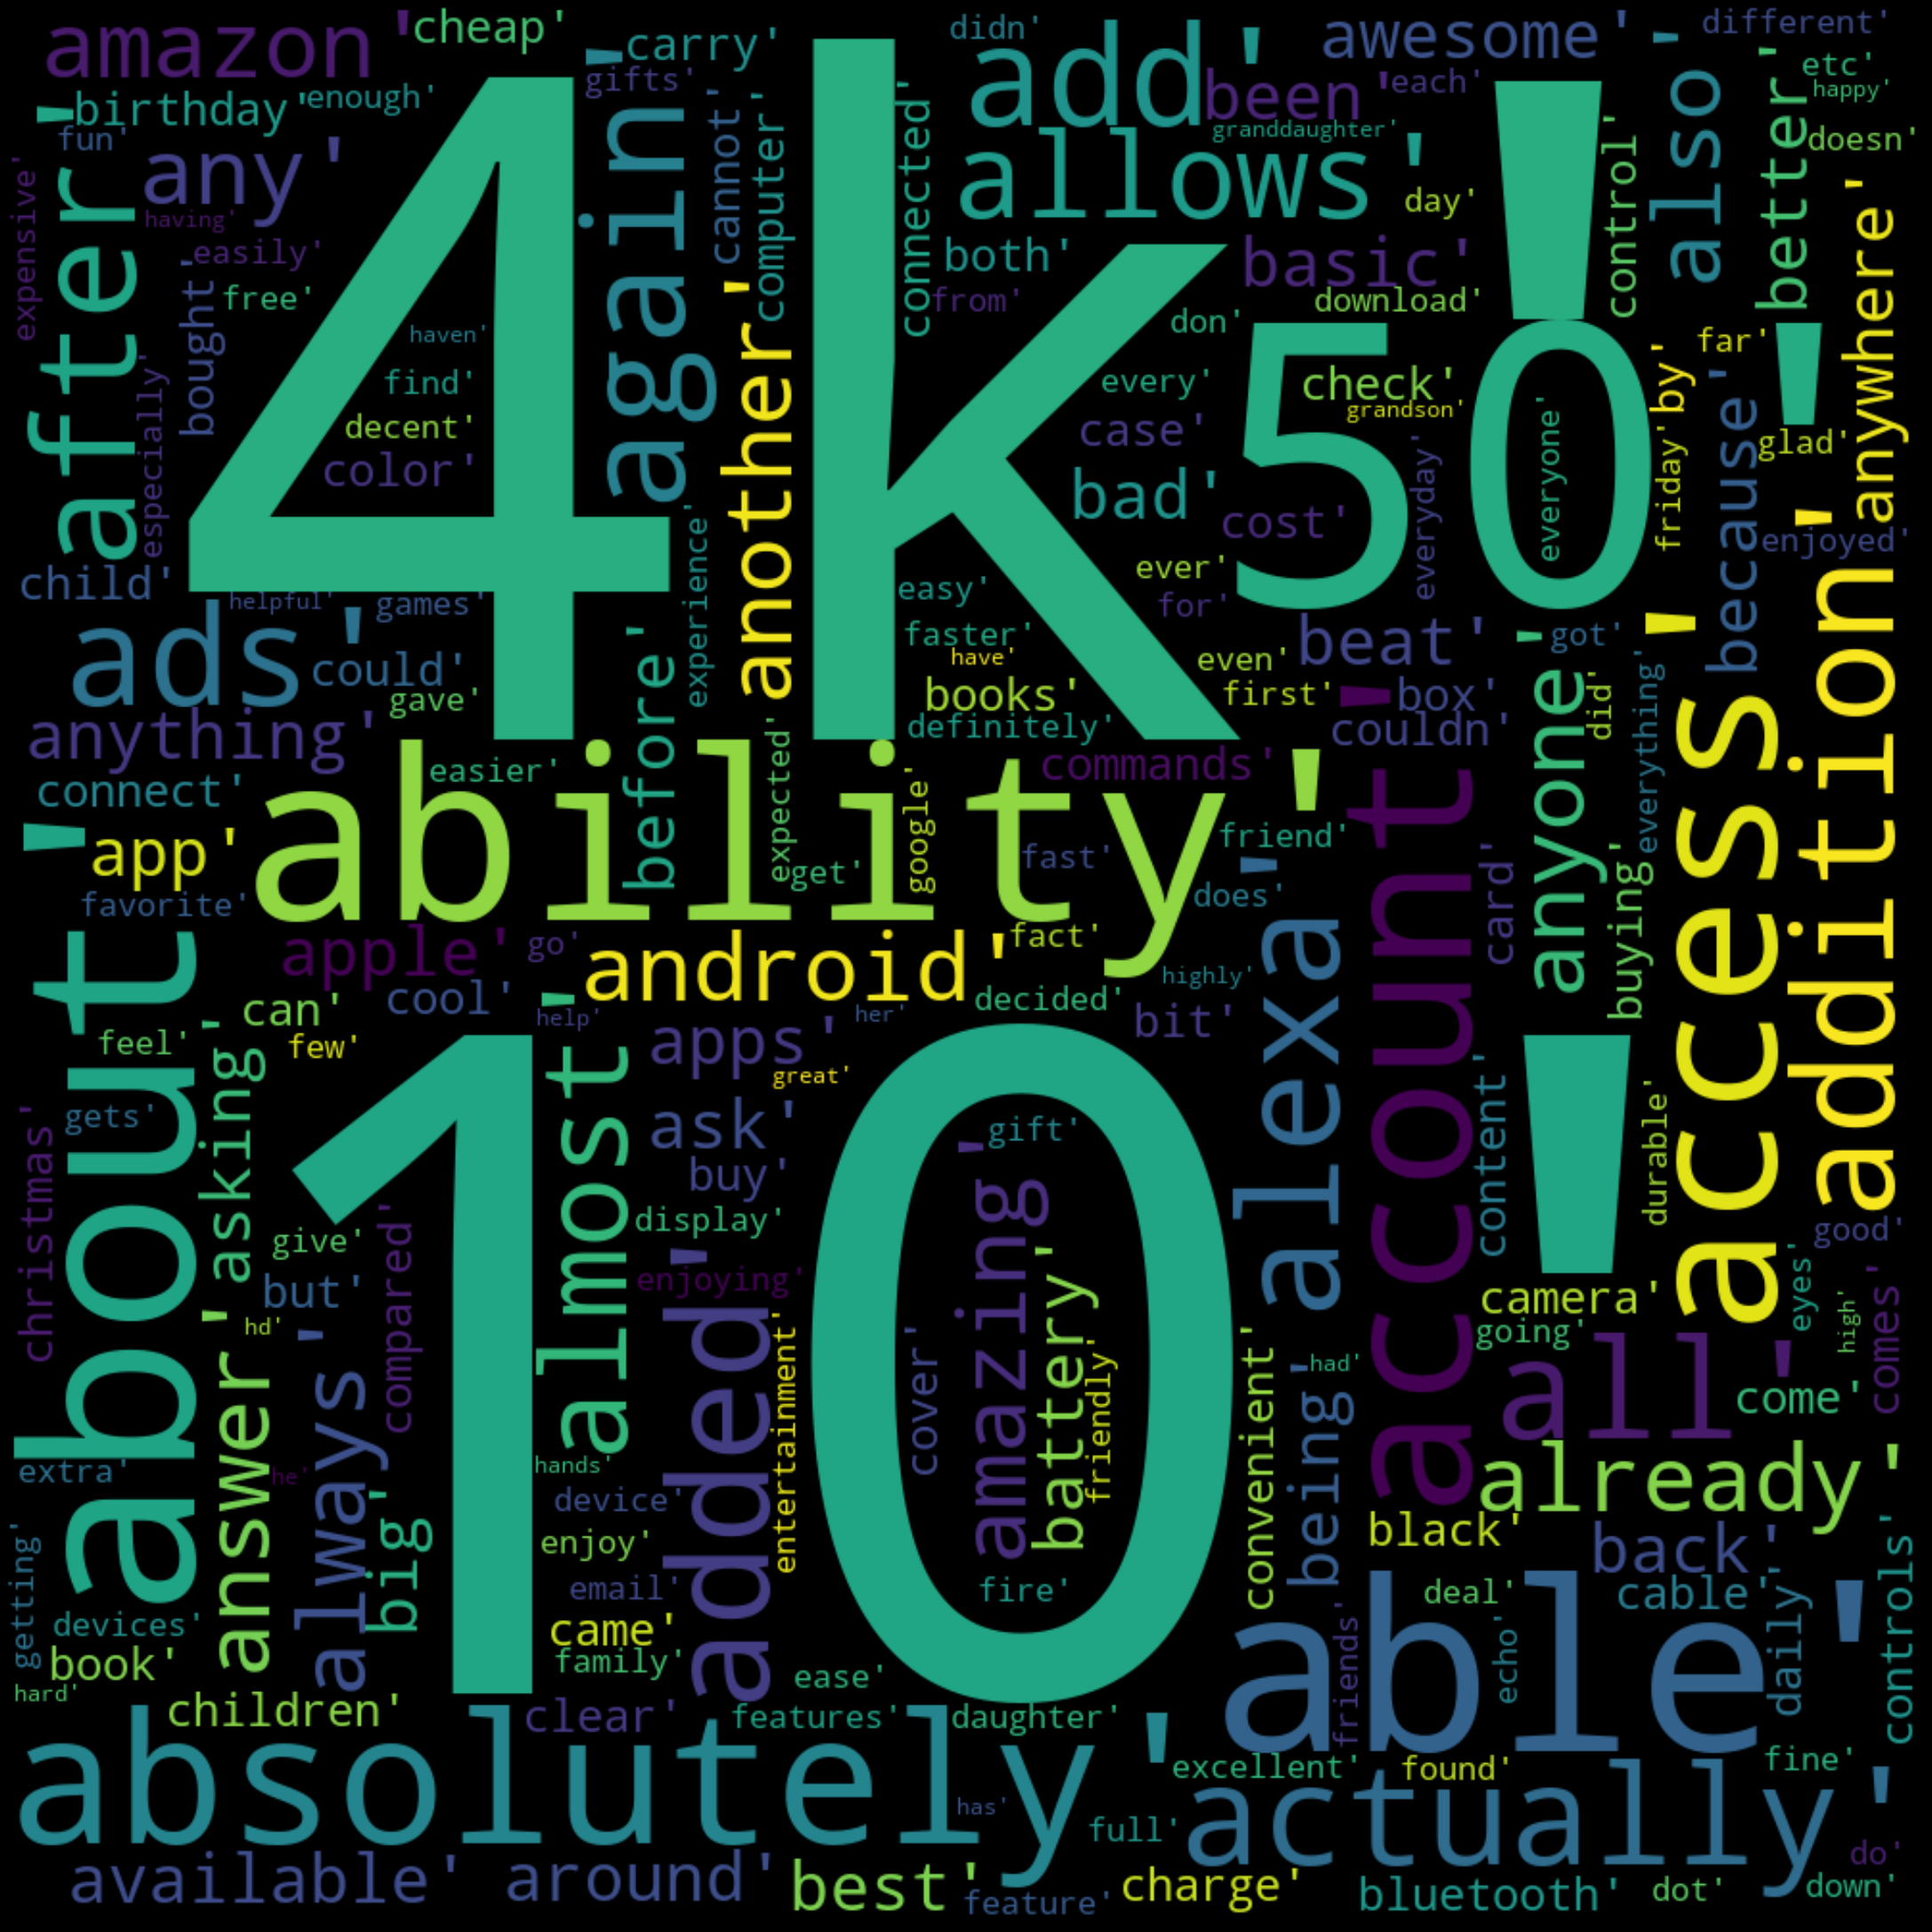

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
text = features
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
wordcounts

10  4k  50  ability  able  about  absolutely  access  account  \
0       0   0   0        1     0      0           0       0        0   
1       0   0   0        0     0      0           0       0        0   
2       0   0   0        0     0      0           0       0        0   
3       0   0   0        0     1      0           0       1        0   
4       0   0   0        0     0      0           0       0        0   
...    ..  ..  ..      ...   ...    ...         ...     ...      ...   
34126   0   0   0        0     0      0           0       0        0   
34127   0   0   0        0     0      1           0       0        0   
34128   0   0   0        0     0      0           0       0        0   
34129   0   0   0        0     0      0           0       0        0   
34130   0   0   0        0     0      0           0       0        0   

       actually  ...  working  works  worth  would  year  years  yet  you  \
0             0  ...        0      0      0      0     0      0    0    0   
1             0  ...        0      0      0      0     0      0    0    0   
2             0  ...        0      0      0      0     0      0    0    0   
3             0  ...        0      0      0      0     0      0    0    1   
4             0  ...        0      0      0      0     0      0    0    1   
...         ...  ...      ...    ...    ...    ...   ...    ...  ...  ...   
34126         0  ...        0      0      0      0     0      0    1   11   
34127         0  ...        0      0      0      2     0      0    0    2   
34128         0  ...        0      1      0      1     0      0    0    2   
34129         0  ...        0      0      0      0     0      0    0    8   
34130         0  ...        0      0      0      0     0      0    0    3   

       your  youtube  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0  
...     ...      ...  
34126     4        0  
34127     0        0  
34128     0        0  
34129     1        0  
34130     1        0  

[34131 rows x 500 columns]

In [23]:
data = pd.concat([wordcounts, reviews], axis = 1)
data.head()

10   4k   50  ability  able  about  absolutely  access  account  actually  \
0  0.0  0.0  0.0      1.0   0.0    0.0         0.0     0.0      0.0       0.0   
1  0.0  0.0  0.0      0.0   0.0    0.0         0.0     0.0      0.0       0.0   
2  0.0  0.0  0.0      0.0   0.0    0.0         0.0     0.0      0.0       0.0   
3  0.0  0.0  0.0      0.0   1.0    0.0         0.0     1.0      0.0       0.0   
4  0.0  0.0  0.0      0.0   0.0    0.0         0.0     0.0      0.0       0.0   

   ...  reviews.doRecommend  reviews.id  reviews.numHelpful  reviews.rating  \
0  ...                 True         NaN                 0.0             5.0   
1  ...                 True         NaN                 0.0             5.0   
2  ...                 True         NaN                 0.0             5.0   
3  ...                 True         NaN                 0.0             4.0   
4  ...                 True         NaN                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5620406/review...   
1  http://reviews.bestbuy.com/3545/5620406/review...   
2  http://reviews.bestbuy.com/3545/5620406/review...   
3  http://reviews.bestbuy.com/3545/5620406/review...   
4  http://reviews.bestbuy.com/3545/5620406/review...   

                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                             reviews.title  reviews.userCity  \
0                                   Kindle               NaN   
1                                very fast               NaN   
2  Beginner tablet for our 9 year old son.               NaN   
3                                  Good!!!               NaN   
4                Fantastic Tablet for kids               NaN   

   reviews.userProvince  reviews.username  
0                   NaN           Adapter  
1                   NaN            truman  
2                   NaN             DaveZ  
3                   NaN            Shacks  
4                   NaN         explore42  

[5 rows x 521 columns]

In [24]:
data.columns 

Index(['10', '4k', '50', 'ability', 'able', 'about', 'absolutely', 'access',
       'account', 'actually',
       ...
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username'],
      dtype='object', length=521)

In [25]:
reviews['reviews.text'].value_counts()

Great product and Best Buy was the best place to purchase from.                                                                                                                                                                                                                                                                                                                            1
Best electronic reader. The base kindle is hard to read because the lack of light and the other readers and apps just don't offer the quality experience and feel of the kindle paperwhite.                                                                                                                                                                                                1
Run this with EMBY client and it works awesome. Love that it plays h265 no problem, one of the few that can actually do it. Highly recommend. ALOT FASTER than the stick in my opinion.                                                       

In [26]:
#Dunnings Method
negative_reviews = wordcounts.loc[data['reviews.doRecommend'] == False, :].sum(axis = 'rows')
positive_reviews = wordcounts.loc[data['reviews.doRecommend'] == True, :].sum(axis = 'rows')

In [27]:
def get_dunnings(word, series1, series2):
    observed = pd.DataFrame({'series1': [series1[word], sum(series1) - series1[word]],
                          'series2': [series2[word], sum(series2) - series2[word]]},
                        index = ['word', 'all_others'])
    total_words = observed.to_numpy().sum()
    observed['word_totals'] = observed.sum(axis = 1)
    observed = observed.append(observed.sum(axis = 0).rename(index = 'group_totals'))
    observed.iat[2,2] = 0
    observed['word_totals'] = observed['word_totals'] / sum(observed['word_totals'])
    observed.loc['group_totals', : ] = observed.loc['group_totals', : ] / sum(observed.loc['group_totals', : ])
    expected = np.outer(observed['word_totals'][0:2], observed.loc['group_totals', : ][0:2])
    expected = pd.DataFrame(expected, index = ['word', 'all_others'], columns = ['series1', 'series2'])
    expected = expected * total_words
    
    G = 0
    for i in range(2):
        for j in range(2):
            O = observed.iat[i, j] + .000001
            E = expected.iat[i, j] + .000001
            G = G + O * math.log(O / E)
    
    if (observed.iat[0, 0] / sum(observed.iloc[0: 2, 0])) < (observed.iat[0, 1] / sum(observed.iloc[0 : 2, 1])):
        G = -G    # we provide a signed version of the statistic to distinguish
                  # overrepresentation in the two categories
    
    return 2 * G

In [28]:
dunningslist = []

for w in vectorizer.get_feature_names():
    G = get_dunnings(w, positive_reviews, negative_reviews)
    dunningslist.append(G)

dunnings = pd.Series(dunningslist, index = vectorizer.get_feature_names())
dunnings = dunnings.sort_values()

In [29]:
dunnings[0:20]

issue      -13.891628
however    -10.550994
tablet     -10.094089
times       -9.337084
not         -8.907913
that        -7.447662
only        -7.231530
them        -6.307064
work        -6.129944
using       -5.964486
he          -5.607341
grandson    -5.452842
or          -5.308994
cheap       -4.921725
screen      -4.912297
helpful     -4.862142
ipad        -4.638568
again       -4.431907
will        -4.287019
easily      -4.248007
dtype: float64

In [30]:
dunnings[-20:]

myself         4.737546
who            4.764590
thought        4.976360
loved          5.085439
lighting       5.210931
item           5.455174
recommend      5.890610
doesn          6.082314
highly         6.106454
actually       6.190255
tv             6.229765
light          6.332072
book           6.617679
feel           7.200803
perfect        8.190672
she            9.652200
read          10.361338
kindle        14.289723
paperwhite    15.432093
reader        15.539586
dtype: float64

In [31]:
#No one mentions “issue” or “cheap” in a positive review

In [32]:
extremefeatures = list(dunnings.index[0:100].values) + list(dunnings.index[-100: ].values)

In [33]:
extremefeatures[0:5]

['issue', 'however', 'tablet', 'times', 'not']

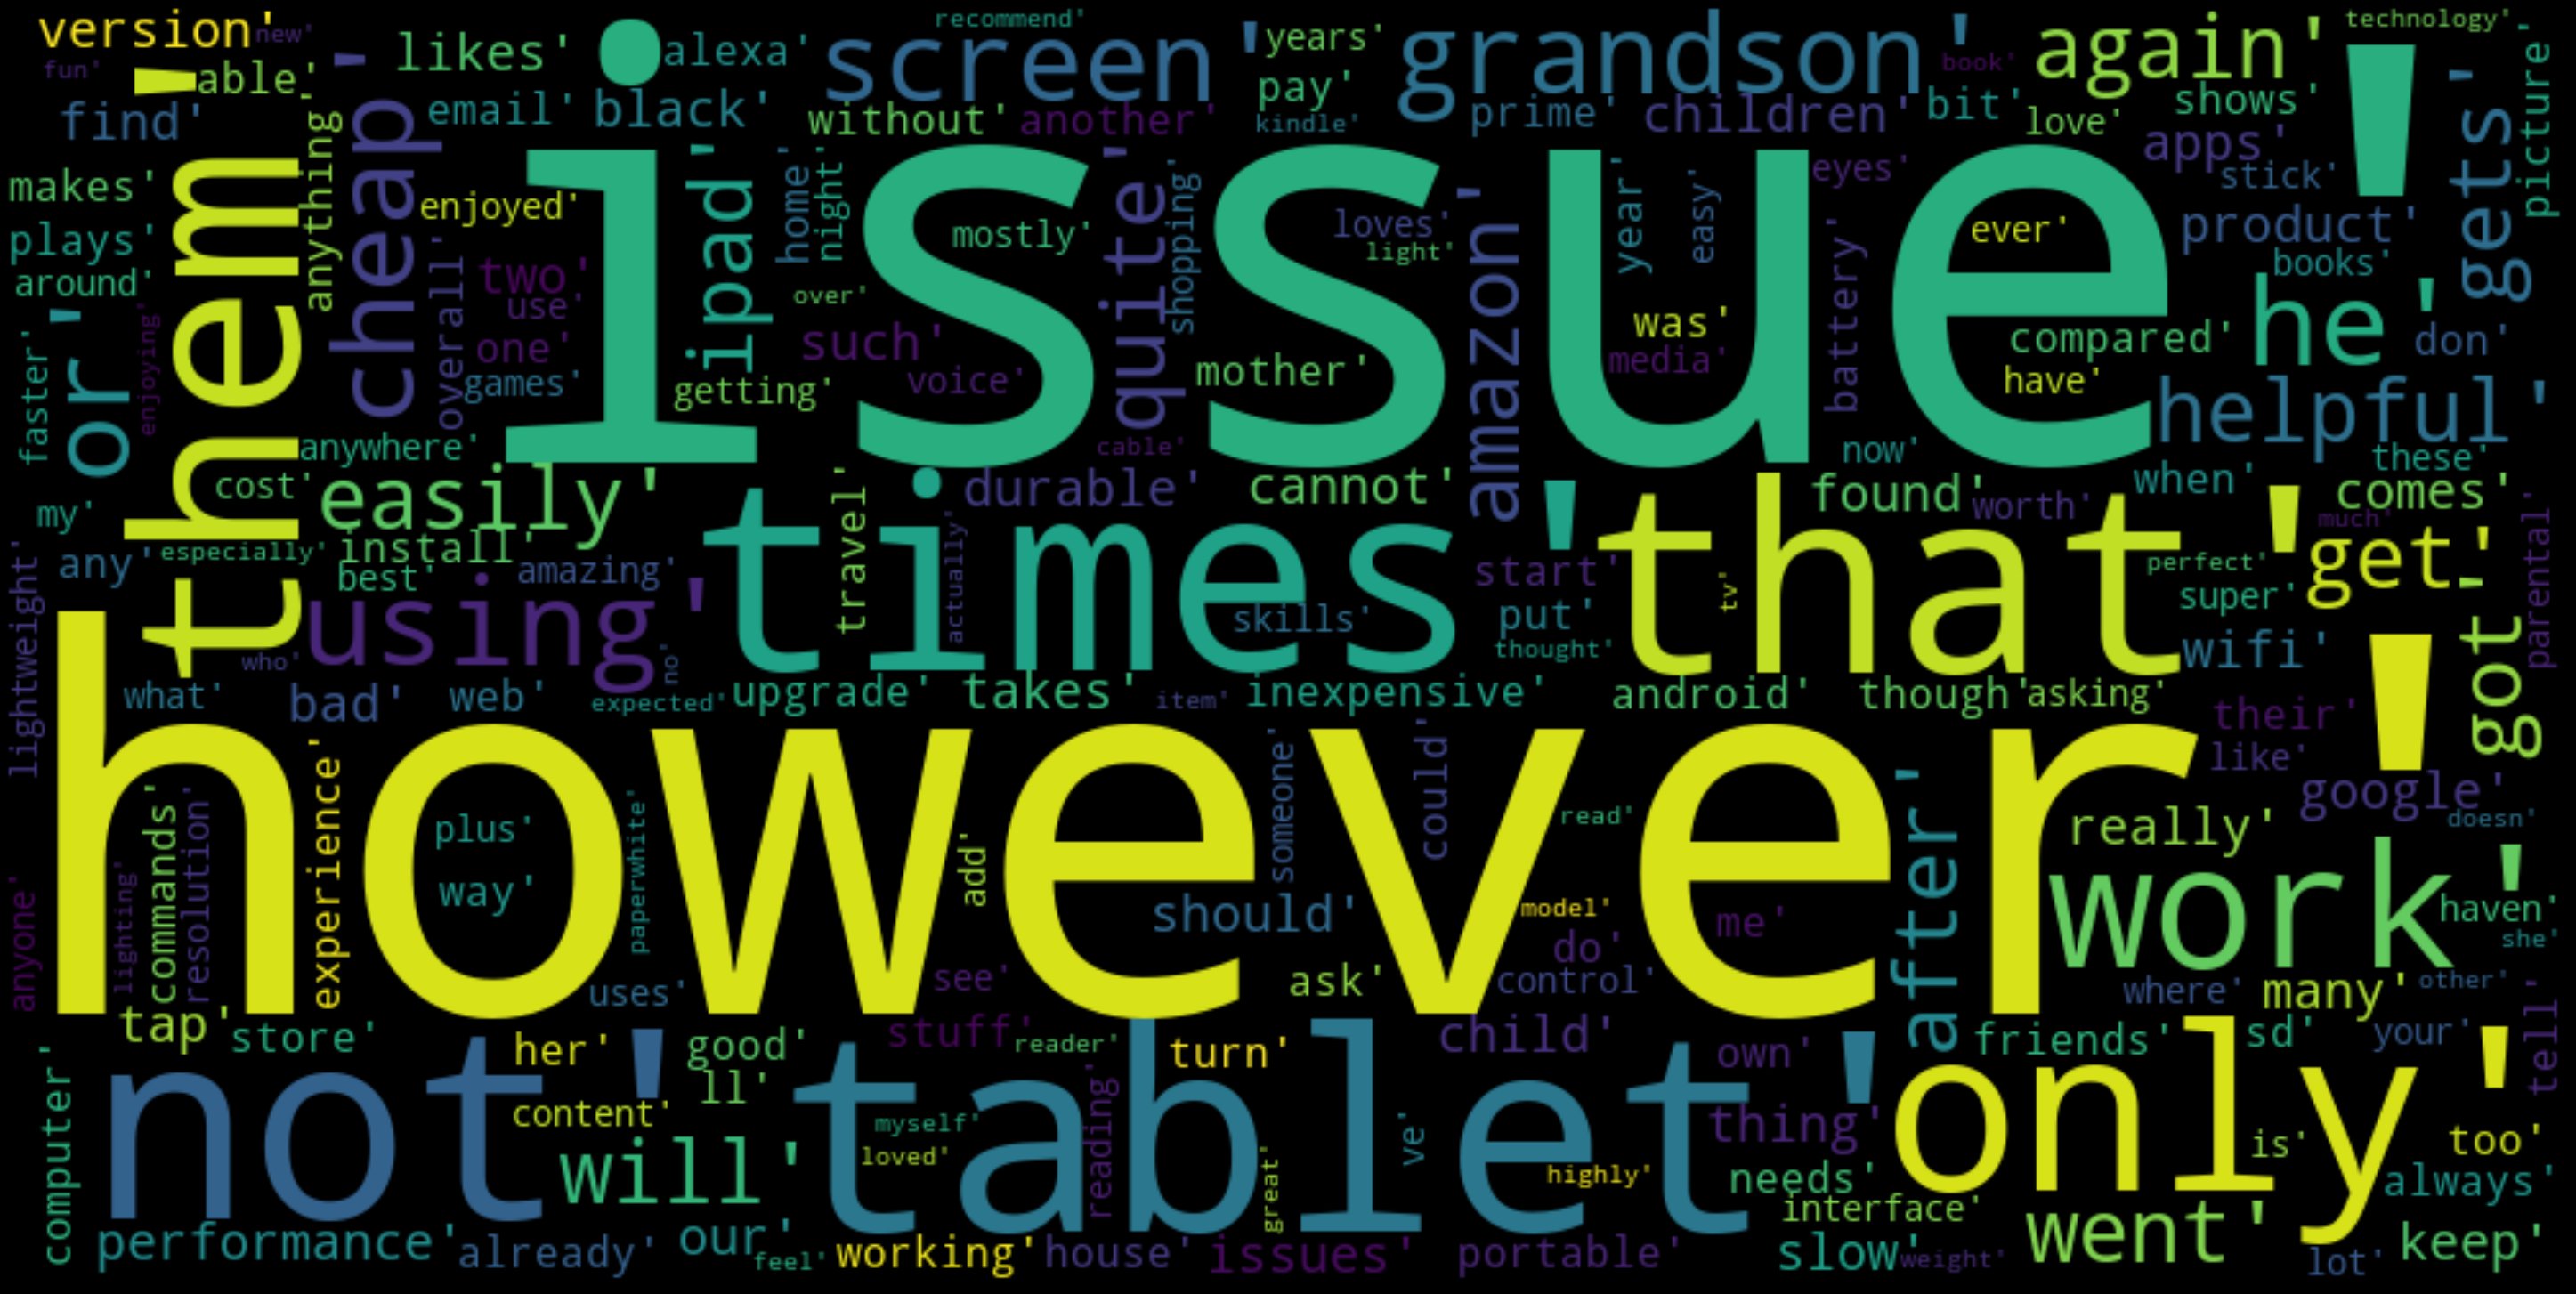

In [34]:
stopwords = set(STOPWORDS)
text = extremefeatures
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'black',
    stopwords = stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
##Reviewlenghts

In [36]:
reviewlengths = cleanreviews['reviews.text'].str.len()
reviewlengths[0:10]

0    143
1     75
2    131
3    593
4    613
5    209
6    115
7    132
8    267
9     55
Name: reviews.text, dtype: int64

In [37]:
reviewlengths[9:]

9          55
10         52
11         86
12        142
13         62
         ... 
34628    1741
34630    1245
34631     838
34632    1721
34633     820
Name: reviews.text, Length: 34122, dtype: int64

In [38]:
wordfrequencies = wordcounts.divide(reviewlengths, axis = 'rows')
wordfrequencies['#reviewlen'] = reviewlengths
wordfreqs = wordfrequencies.dropna()
wordfreqs

10   4k   50   ability      able     about  absolutely    access  \
0      0.0  0.0  0.0  0.006993  0.000000  0.000000         0.0  0.000000   
1      0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
2      0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
3      0.0  0.0  0.0  0.000000  0.001686  0.000000         0.0  0.001686   
4      0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
...    ...  ...  ...       ...       ...       ...         ...       ...   
34126  0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
34127  0.0  0.0  0.0  0.000000  0.000000  0.009615         0.0  0.000000   
34128  0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
34129  0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   
34130  0.0  0.0  0.0  0.000000  0.000000  0.000000         0.0  0.000000   

       account  actually  ...     works  worth     would  year  years  \
0          0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
1          0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
2          0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
3          0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
4          0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
...        ...       ...  ...       ...    ...       ...   ...    ...   
34126      0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
34127      0.0       0.0  ...  0.000000    0.0  0.019231   0.0    0.0   
34128      0.0       0.0  ...  0.016393    0.0  0.016393   0.0    0.0   
34129      0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   
34130      0.0       0.0  ...  0.000000    0.0  0.000000   0.0    0.0   

            yet       you      your  youtube  #reviewlen  
0      0.000000  0.000000  0.000000      0.0       143.0  
1      0.000000  0.000000  0.000000      0.0        75.0  
2      0.000000  0.000000  0.000000      0.0       131.0  
3      0.000000  0.001686  0.000000      0.0       593.0  
4      0.000000  0.001631  0.000000      0.0       613.0  
...         ...       ...       ...      ...         ...  
34126  0.014286  0.157143  0.057143      0.0        70.0  
34127  0.000000  0.019231  0.000000      0.0       104.0  
34128  0.000000  0.032787  0.000000      0.0        61.0  
34129  0.000000  0.131148  0.016393      0.0        61.0  
34130  0.000000  0.008772  0.002924      0.0       342.0  

[33629 rows x 501 columns]

In [39]:
wordfreqs = wordfreqs.sample(frac = 1)
wordfreqs.head()

10   4k   50  ability  able     about  absolutely  access  account  \
25006  0.0  0.0  0.0      0.0   0.0  0.000000         0.0     0.0      0.0   
33156  0.0  0.0  0.0      0.0   0.0  0.000000         0.0     0.0      0.0   
20155  0.0  0.0  0.0      0.0   0.0  0.000000         0.0     0.0      0.0   
12540  0.0  0.0  0.0      0.0   0.0  0.000000         0.0     0.0      0.0   
19765  0.0  0.0  0.0      0.0   0.0  0.009434         0.0     0.0      0.0   

       actually  ...  works     worth     would  year     years  yet  \
25006       0.0  ...    0.0  0.005848  0.005848   0.0  0.000000  0.0   
33156       0.0  ...    0.0  0.000000  0.000000   0.0  0.000000  0.0   
20155       0.0  ...    0.0  0.000000  0.000000   0.0  0.000000  0.0   
12540       0.0  ...    0.0  0.000000  0.000000   0.0  0.000000  0.0   
19765       0.0  ...    0.0  0.000000  0.018868   0.0  0.009434  0.0   

            you      your  youtube  #reviewlen  
25006  0.017544  0.000000      0.0       171.0  
33156  0.000000  0.000000      0.0       220.0  
20155  0.000000  0.000000      0.0        56.0  
12540  0.000000  0.000000      0.0        77.0  
19765  0.037736  0.009434      0.0       106.0  

[5 rows x 501 columns]

In [40]:
reorderedreviews = reviews.loc[wordfreqs.index, : ]
reorderedreviews.head()

id  \
25006  AVpfl8cLLJeJML43AE3S   
33156  AV1YE_muvKc47QAVgpwE   
20155  AV1YnRtnglJLPUi8IJmV   
12540  AVphgVaX1cnluZ0-DR74   
19765  AV1YnRtnglJLPUi8IJmV   

                                                    name  \
25006  Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Specia...   
33156                                                NaN   
20155  Amazon Kindle Paperwhite - eBook reader - 4 GB...   
12540  Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...   
19765  Amazon Kindle Paperwhite - eBook reader - 4 GB...   

                       asins           brand  \
25006  B00L9EPT8O,B01E6AO69U          Amazon   
33156             B00U3FPN4U  Amazon Fire Tv   
20155             B00OQVZDJM          Amazon   
12540             B018Y229OU          Amazon   
19765             B00OQVZDJM          Amazon   

                                              categories  \
25006  Stereos,Remote Controls,Amazon Echo,Audio Dock...   
33156  Back To College,College Electronics,College Tv...   
20155  Walmart for Business,Office Electronics,Tablet...   
12540  Fire Tablets,Tablets,Computers & Tablets,All T...   
19765  Walmart for Business,Office Electronics,Tablet...   

                                                    keys manufacturer  \
25006  echowhite/263039693056,echowhite/152558276095,...       Amazon   
33156  848719057492,amazonfiretv/51454342,amazonfiret...       Amazon   
20155  amazon/b00oqvzdjm,848719056099,amazonkindlepap...       Amazon   
12540  firetablet7displaywifi8gbincludesspecialoffers...       Amazon   
19765  amazon/b00oqvzdjm,848719056099,amazonkindlepap...       Amazon   

                   reviews.date     reviews.dateAdded  \
25006  2016-12-14T00:00:00.000Z                   NaN   
33156  2016-10-19T00:00:00.000Z  2017-09-20T05:35:53Z   
20155  2016-12-14T00:00:00.000Z  2017-09-05T22:09:30Z   
12540  2016-02-21T00:00:00.000Z  2017-05-21T03:21:28Z   
19765  2017-07-28T00:00:00.000Z  2017-09-05T22:09:30Z   

                                        reviews.dateSeen  ...  \
25006  2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...  ...   
33156  2017-08-25T22:04:59.125Z,2017-08-19T09:35:27.7...  ...   
20155  2017-08-31T22:32:51.542Z,2017-08-02T19:53:37.7...  ...   
12540  2017-04-30T00:22:00.000Z,2017-06-07T08:12:00.000Z  ...   
19765  2017-08-31T22:33:02.171Z,2017-08-02T22:17:48.0...  ...   

      reviews.doRecommend reviews.id  reviews.numHelpful  reviews.rating  \
25006                True        NaN                 0.0             5.0   
33156                True        NaN                 0.0             5.0   
20155                True        NaN                 0.0             5.0   
12540                True        NaN                 0.0             4.0   
19765                True        NaN                 0.0             5.0   

                                      reviews.sourceURLs  \
25006  http://reviews.bestbuy.com/3545/5588528/review...   
33156  http://reviews.bestbuy.com/3545/4370400/review...   
20155  http://reviews.bestbuy.com/3545/9439005/review...   
12540  http://reviews.bestbuy.com/3545/5025800/review...   
19765  http://reviews.bestbuy.com/3545/9439005/review...   

                                            reviews.text  \
25006  Amazon Echo is i great device to assist in hom...   
33156  This box is very easy to program and to use. W...   
20155  Love to use it everyday. Inside light is usefu...   
12540  Bought for a friend and checked it out after p...   
19765  Will update with feedback in due time. I caref...   

                     reviews.title reviews.userCity  reviews.userProvince  \
25006        My personal assistant              NaN                   NaN   
33156  I like better than apple tv              NaN                   NaN   
20155                      Perfect              NaN                   NaN   
12540                   Nice price              NaN                   NaN   
19765         For my 11yo bookworm              NaN                   NaN   

       revie

In [41]:
testfreqs = wordfreqs.iloc[0: 5000, : ]
test_y = (reorderedreviews['reviews.doRecommend'][0: 5000] == True).astype(int) 
test_y[0:10]

25006    1
33156    1
20155    1
12540    1
19765    1
21178    1
2080     1
1468     1
24021    1
19056    1
Name: reviews.doRecommend, dtype: int32

In [42]:
trainfreqs = wordfreqs.iloc[5000 : , : ]
train_y = (reorderedreviews['reviews.doRecommend'][5000: ] == True).astype(int) 
train_y[0:10]

7870     1
24043    1
7578     1
18592    1
14430    1
14150    1
26236    1
14371    1
629      1
9849     1
Name: reviews.doRecommend, dtype: int32

In [43]:
trainscaler = StandardScaler()
trainXscaled = trainscaler.fit_transform(trainfreqs)
trainXscaled = pd.DataFrame(trainXscaled, columns = trainfreqs.columns)
trainXscaled

10        4k        50   ability      able     about  absolutely  \
0     -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
1     -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
2     -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
3     -0.082894 -0.087539 -0.094035 -0.082794  1.480816 -0.174212   -0.107125   
4     -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
...         ...       ...       ...       ...       ...       ...         ...   
28624 -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
28625 -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
28626 -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
28627 -0.082894 -0.087539 -0.094035 -0.082794 -0.158287 -0.174212   -0.107125   
28628 -0.082894 -0.087539 -0.094035 -0.082794 -0.158287  3.525735   -0.107125   

         access   account  actually  ...     works     worth     would  \
0     -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
1     -0.117057  7.359357 -0.076164  ...  6.053906 -0.139767 -0.251102   
2     -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
3     -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
4     -0.117057 -0.078776 -0.076164  ...  0.380460 -0.139767 -0.251102   
...         ...       ...       ...  ...       ...       ...       ...   
28624 -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
28625 -0.117057 -0.078776 -0.076164  ...  3.864037 -0.139767 -0.251102   
28626 -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
28627 -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   
28628 -0.117057 -0.078776 -0.076164  ... -0.252918 -0.139767 -0.251102   

           year     years       yet       you      your   youtube  #reviewlen  
0     -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059   -0.298239  
1     -0.176934 -0.109532 -0.093748  2.181627 -0.164217 -0.080059   -0.367147  
2     -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059   -0.510704  
3     -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059    0.689440  
4     -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059    1.780480  
...         ...       ...       ...       ...       ...       ...         ...  
28624 -0.176934 -0.109532 -0.093748  0.198338 -0.164217 -0.080059    0.499944  
28625 -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059   -0.493478  
28626 -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059   -0.407343  
28627 -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059   -0.355662  
28628 -0.176934 -0.109532 -0.093748 -0.272443 -0.164217 -0.080059    0.356386  

[28629 rows x 501 columns]

In [44]:
testscaler = StandardScaler()
testXscaled = testscaler.fit_transform(testfreqs)
testXscaled = pd.DataFrame(testXscaled, columns = testfreqs.columns)
testXscaled

10        4k        50   ability      able     about  absolutely  \
0    -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
1    -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
2    -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
3    -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
4    -0.081392 -0.073802 -0.086648 -0.079342 -0.153801  3.720662   -0.105644   
...        ...       ...       ...       ...       ...       ...         ...   
4995 -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
4996 -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
4997 -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
4998 -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   
4999 -0.081392 -0.073802 -0.086648 -0.079342 -0.153801 -0.178350   -0.105644   

        access   account  actually  ...     works     worth     would  \
0    -0.119566 -0.095908 -0.071726  ... -0.266082  2.999429  1.200927   
1    -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
2    -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
3    -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
4    -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113  4.344753   
...        ...       ...       ...  ...       ...       ...       ...   
4995 -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
4996 -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113  2.156142   
4997 -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
4998 -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   
4999 -0.119566 -0.095908 -0.071726  ... -0.266082 -0.141113 -0.211131   

          year     years       yet       you      your   youtube  #reviewlen  
0    -0.178026 -0.113270 -0.094032  1.443342 -0.180324 -0.072874    0.091217  
1    -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874    0.416290  
2    -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.671710  
3    -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.532393  
4    -0.178026  6.730442 -0.094032  3.364089  3.062728 -0.072874   -0.340003  
...        ...       ...       ...       ...       ...       ...         ...  
4995 -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.386442  
4996 -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.366539  
4997 -0.178026 -0.113270 -0.094032  0.199158 -0.180324 -0.072874    0.442826  
4998 -0.178026 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.658441  
4999  5.866710 -0.113270 -0.094032 -0.225504 -0.180324 -0.072874   -0.665076  

[5000 rows x 501 columns]

In [45]:
len(trainXscaled)

28629

In [46]:
len(testXscaled)

5000

In [47]:
# Replace "nan" with space
#trainXscaled = trainXscaled.fillna(' ')
#train_y = train_y.fillna(' ')
#trainXscaled = trainXscaled.replace(r'^\s*$', np.nan, regex=True)
#train_y = train_y.replace(r'^\s*$', np.nan, regex=True)

In [48]:
#cross-validating a model
logist = LogisticRegression(C = .1, max_iter = 1000) 
logist.fit(trainXscaled, train_y)
predictions = logist.predict(testXscaled)
print((sum(predictions == test_y) / len(predictions))*100)

accuracy_logist = accuracy_score(test_y, logist.predict(testXscaled))
accuracy_logist = (accuracy_logist*100)
print("Accuracy of Logistic Regression with CV is ", accuracy_logist, '%')

96.14
Accuracy of Logistic Regression with CV is  96.14 %


In [49]:
logist.predict(testXscaled)

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
confusion_matrix(test_y, logist.predict(testXscaled))

array([[   0,  189],
       [   4, 4807]], dtype=int64)

In [51]:
###he obtained matrix shows the following:

#Zero true negative predictions
#Four false negative predictions
#189 false positive prediction
#4807 true positive predictions

In [52]:
score = logist.score(testXscaled, test_y)
print(score)

0.9614


In [53]:
score2 = logist.score(trainXscaled, train_y)
print(score2)

0.9568619232247022


In [54]:
cm = metrics.confusion_matrix(test_y, predictions)
print(cm)

[[   0  189]
 [   4 4807]]


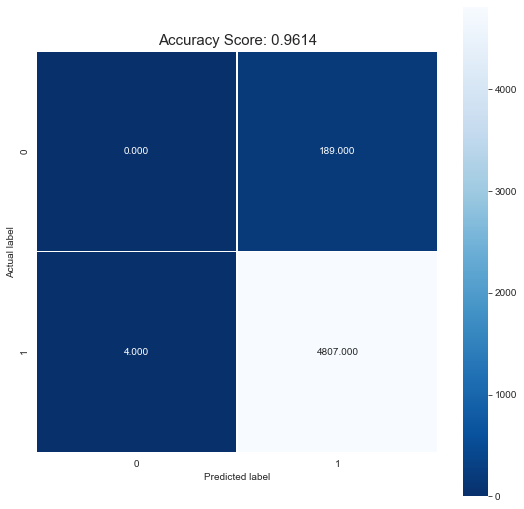

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [56]:
trainXscaled.shape

(28629, 501)

In [57]:
train_y.shape

(28629,)

In [58]:
reviews.shape

(34660, 21)

In [59]:
sum(test_y) / len(test_y)

0.9622

In [60]:
f1_score(test_y, predictions)

0.9803201794636485

In [61]:
#calculate precision
tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))


0.9622 0.9992 0.9803


In [62]:
#Handling imbalanced classes
logist = LogisticRegression(C = .1, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_y)

predictions = logist.predict(testXscaled)

tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))

0.9757 0.6165 0.7556


In [63]:
#cross-validating seperatley on training set
logist = LogisticRegression(C = .01, max_iter = 1000, class_weight = 'balanced')
results = cross_validate(logist, trainXscaled, train_y, cv = 5, scoring = 'f1')
print(results)
print()
print('Mean f1:', np.mean(results['test_score']))

{'fit_time': array([0.50411797, 0.49611163, 0.54713416, 0.5741322 , 0.60584617]), 'score_time': array([0.00900149, 0.0080018 , 0.00900221, 0.00900102, 0.00900102]), 'test_score': array([0.75383931, 0.75928595, 0.75622776, 0.75926951, 0.75794838])}

Mean f1: 0.7573141800069694


In [64]:
#cross-validate on trainXscaled and reporting the f1 score
for c_param in [.00001, .0001, .001, .01, .1, 1, 10]:
    logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced') 
    results = cross_validate(logist, trainXscaled, train_y, cv = 5, scoring = 'f1')
    print('C parameter:', c_param)
    print('Mean f1:', np.mean(results['test_score']))
    print()

C parameter: 1e-05
Mean f1: 0.6965619120291706

C parameter: 0.0001
Mean f1: 0.7537082361410137

C parameter: 0.001
Mean f1: 0.7610129193424762

C parameter: 0.01
Mean f1: 0.7573141800069694

C parameter: 0.1
Mean f1: 0.7568671198162947

C parameter: 1
Mean f1: 0.7568401838482602

C parameter: 10
Mean f1: 0.756840343967436



In [65]:
#Since the best C parapmeter is .001. We will train a model using that parameter on the training set and check its performance on the test set.
logist = LogisticRegression(C = .001, max_iter = 1000, class_weight = 'balanced') 
logist.fit(trainXscaled, train_y)
predictions = logist.predict(testXscaled)

tp = sum((test_y == 1) & (predictions == 1))
fp = sum((test_y == 0) & (predictions == 1))
fn = sum((test_y == 1) & (predictions == 0))

precision = tp / (tp + fp)
recall = tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

print(round(precision, 4), round(recall, 4), round(F1, 4))

0.9762 0.6217 0.7596


In [66]:
# The F1 measure is 0.75 which is the correct measure of how we can seperate postove and negative reviews in the future

In [67]:
#Identifyinf Predictive Features
logist = LogisticRegression(C = c_param, max_iter = 1000, class_weight = 'balanced')
logist.fit(trainXscaled, train_y)
coefficients = [x for x in zip(logist.coef_[0], vectorizer.get_feature_names())]

In [68]:
coefficients.sort()

In [69]:
coefficients[0:20]

[(-0.27040413747750147, 'black'),
 (-0.14848239876462485, 'tap'),
 (-0.12491238397409468, 'fire'),
 (-0.11950693557133495, 'to'),
 (-0.11552791973554287, 'such'),
 (-0.11548784992780822, 'using'),
 (-0.10743211120622002, 'home'),
 (-0.10687021648031601, 'sd'),
 (-0.10099788506741017, 'playing'),
 (-0.09628949762224297, 'last'),
 (-0.09458333143384028, 'went'),
 (-0.09439807943281331, 'bad'),
 (-0.09399417742602012, 'quite'),
 (-0.09135592459185976, 'set'),
 (-0.09118821784842315, 'streaming'),
 (-0.08996904142943972, 'older'),
 (-0.08831659660202229, 'without'),
 (-0.08827178280161858, 'how'),
 (-0.08820359901441387, 'echo'),
 (-0.08774620901637978, 'comes')]

In [70]:
coefficients[-20:]

[(0.11601728041157562, 'once'),
 (0.11616846213431271, 'love'),
 (0.1178072189593678, 'feel'),
 (0.1178307345826941, 'see'),
 (0.12103186923561877, 'loved'),
 (0.12116276206107607, 'cable'),
 (0.12319810996618254, 'especially'),
 (0.12421142193771682, 'lighting'),
 (0.125977924561832, 'she'),
 (0.1273471064158136, 'great'),
 (0.13012057717308895, 'ads'),
 (0.13020922593134931, 'asking'),
 (0.14074011583429774, 'no'),
 (0.14240068010261522, 'over'),
 (0.17259139735226736, 'someone'),
 (0.17931440048367078, 'reader'),
 (0.18330429388699662, 'tv'),
 (0.19128741873059654, 'bluetooth'),
 (0.2183990090748465, 'enjoying'),
 (0.2924966848823079, 'friday')]

In [71]:
###K Fold Cross Validation of Logistic Regression
###So, we find out mean and Std dev to communicate how good our model is when it tries to predict new data

In [72]:
from sklearn.model_selection import KFold
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits = 12, random_state = 42, shuffle=True)

model = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', C = 0.1, max_iter = 800)

scores = cross_val_score(model, trainXscaled, train_y, scoring = 'accuracy', cv = cv, n_jobs = -1)

print('Mean: %.3f, Std (%.3f)' % (mean(scores), std(scores)))

Mean: 0.613, Std (0.010)


### Ridge

In [73]:
from sklearn.linear_model import RidgeClassifier
ridgeclf = RidgeClassifier(alpha = 0.1).fit(trainXscaled, train_y)

In [74]:
ridgeclf.predict(testXscaled)

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
score = ridgeclf.score(testXscaled, test_y)
print(score)

0.9622


In [76]:
ridgeclf.classes_

array([0, 1])

In [77]:
from sklearn.metrics import accuracy_score
accuracy_rcv = accuracy_score(test_y, ridgeclf.predict(testXscaled))
accuracy_rcv = round(accuracy_rcv * 100, 2)

print("Accuracy of Ridge Classifier is ", accuracy_rcv, '%')

Accuracy of Ridge Classifier is  96.22 %


In [78]:
a = ridgeclf.decision_function(testXscaled)

In [79]:
a[20:]

array([0.91779517, 0.8735832 , 0.9215182 , ..., 0.91710433, 0.87017948,
       1.02400991])

In [80]:
a.tolist()

[0.8266681774971129,
 0.9047521519546488,
 0.7937144998588471,
 1.0222642221245615,
 1.030472208561494,
 0.9455502097103743,
 0.9707472287719896,
 0.9549100528266297,
 0.9015209365430686,
 0.9296582904618014,
 0.9714634835142613,
 0.9873352184759339,
 0.9495560246778865,
 1.0968402166304694,
 0.8987801807524087,
 0.9506837226815116,
 1.0488909670955566,
 0.8446819997406061,
 0.822408453936575,
 0.9040390417851809,
 0.9177951697104657,
 0.8735831987554918,
 0.9215182009829179,
 0.9180879570706151,
 0.9092601872591758,
 0.8515298212387348,
 0.9270595668599237,
 0.8723235228388536,
 0.9564918997022893,
 0.8182384280460732,
 0.8554215194383192,
 0.969594312119503,
 1.0377445534533845,
 0.9711732258298911,
 0.8516050480600712,
 0.8452999377329999,
 0.9676863808382307,
 0.8634757324489574,
 0.9199218483456499,
 0.9861910991834726,
 0.7934797529010488,
 0.7666697147191861,
 0.8770733787294425,
 0.9169118679454205,
 0.9341043291984562,
 0.8436110976047777,
 0.8863031781935784,
 0.8967706578403

In [81]:
### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(trainXscaled, train_y)

model_accuracy = accuracy_score(test_y, classifier.predict(testXscaled))
accuracy_rounded_rf = round(model_accuracy*100,5)

print("Accuracy of Random Forest is ", accuracy_rounded_rf, '%')

Accuracy of Random Forest is  96.22 %


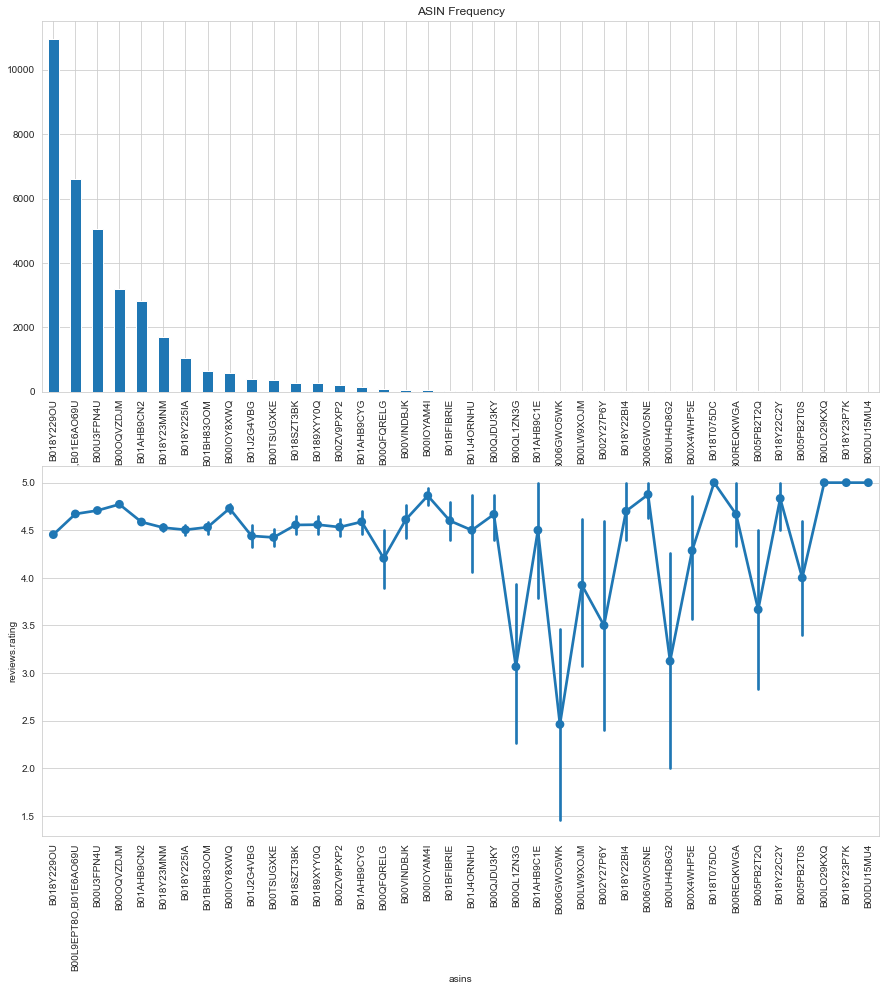

In [83]:
#some more plots
asins_count = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(15,15))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count, data=reviews)
plt.xticks(rotation=90)
plt.show()

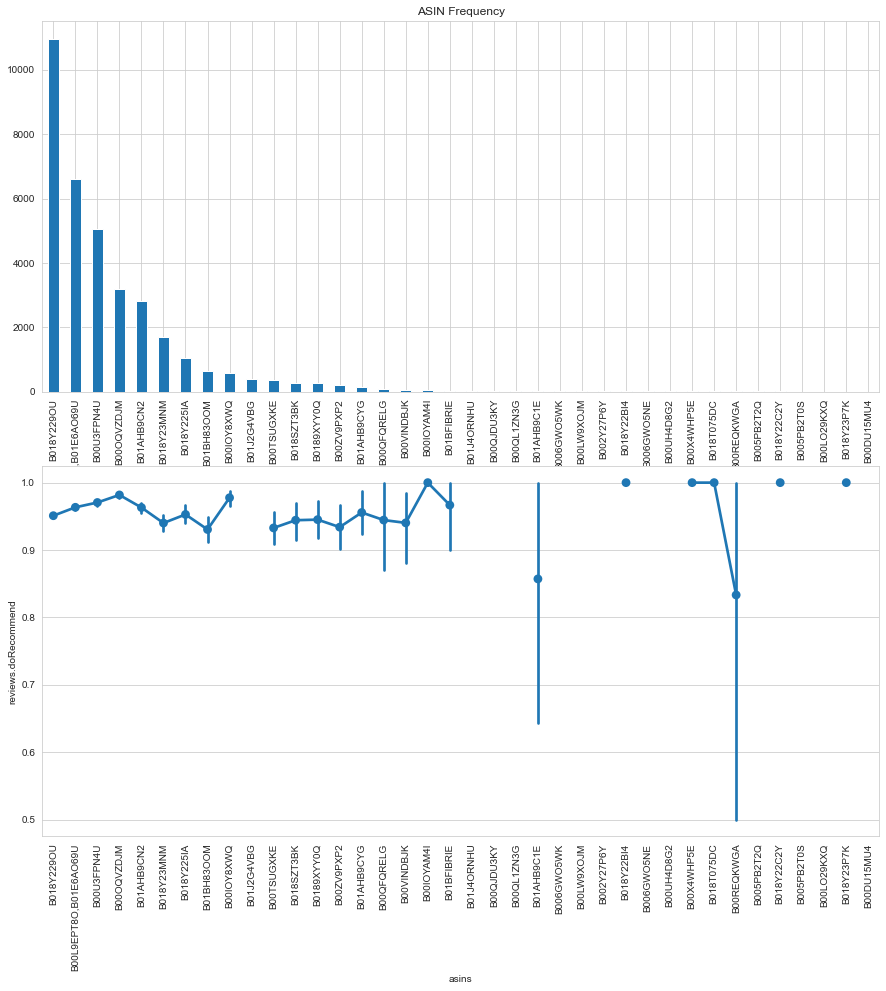

In [84]:
plt.subplots (2,1,figsize=(15,15))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [85]:
#From the above analysis we can see that the first 18 ASINs show that the consumers recommend the product
#and have good ratings between 4 and 5. The remaining ASINs have fluctuating results due to lower sample size.

In [86]:
#Asins and review rating
avg_rating = cleanreviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

reviews.rating
asins                     
B002Y27P6Y        2.750000
B005PB2T0S        4.000000
B005PB2T2Q        3.666667
B00IOY8XWQ        4.729310
B00IOYAM4I        4.862745

In [87]:
counts = cleanreviews["asins"].value_counts().to_frame()
counts.head()

asins
B018Y229OU             10966
B00L9EPT8O,B01E6AO69U   6608
B00U3FPN4U              5056
B00OQVZDJM              3176
B01AHB9CN2              2814

In [88]:
#Asins and average review rating
table = counts.join(avg_rating)
table.head(30)

asins  reviews.rating
B018Y229OU             10966        4.454222
B00L9EPT8O,B01E6AO69U   6608        4.670702
B00U3FPN4U              5056        4.707278
B00OQVZDJM              3176        4.772355
B01AHB9CN2              2814        4.586709
B018Y23MNM              1685        4.527003
B018Y225IA              1038        4.504817
B01BH83OOM               636        4.531447
B00IOY8XWQ               580        4.729310
B00TSUGXKE               372        4.424731
B018SZT3BK               269        4.553903
B0189XYY0Q               256        4.558594
B00ZV9PXP2               212        4.533019
B01AHB9CYG               158        4.588608
B00VINDBJK                67        4.611940
B00QFQRELG                66        4.121212
B00IOYAM4I                51        4.862745
B01BFIBRIE                30        4.600000
B01AHB9C1E                14        4.500000
B018Y22BI4                10        4.700000
B00QL1ZN3G                 8        1.750000
B018T075DC                 7        5.000000
B00UH4D8G2                 7        2.857143
B00REQKWGA                 6        4.666667
B005PB2T2Q                 6        3.666667
B018Y22C2Y                 6        4.833333
B005PB2T0S                 5        4.000000
B00QJDU3KY                 5        4.800000
B01J4ORNHU                 4        4.500000
B002Y27P6Y                 4        2.750000

asins  reviews.rating
asins           1.000000        0.145934
reviews.rating  0.145934        1.000000

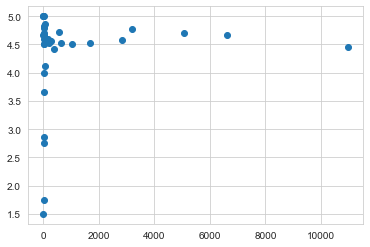

In [89]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

In [90]:
# From our analysis we can say that, ASINs with low occurrence that have high variances, theses low occurrence ASINs are not 
#significant in our analysis given the low sample size.
# In ourcorrelation analysis between ASINs and reviews.rating, we see that there is almost no correlation.